In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

#Preparing Data

_data_ = [pd.read_csv('/Users/landonbuechner/Documents/Finance/Portfolio Optimization/Securities/ABBV.csv'),
          pd.read_csv('/Users/landonbuechner/Documents/Finance/Portfolio Optimization/Securities/BABA.csv'),
          pd.read_csv('/Users/landonbuechner/Documents/Finance/Portfolio Optimization/Securities/JPM.csv'),
          pd.read_csv('/Users/landonbuechner/Documents/Finance/Portfolio Optimization/Securities/LNG.csv'),
          pd.read_csv('/Users/landonbuechner/Documents/Finance/Portfolio Optimization/Securities/MA.csv'),
          pd.read_csv('/Users/landonbuechner/Documents/Finance/Portfolio Optimization/Securities/MIC.csv'),
          pd.read_csv('/Users/landonbuechner/Documents/Finance/Portfolio Optimization/Securities/NBL.csv'),
          pd.read_csv('/Users/landonbuechner/Documents/Finance/Portfolio Optimization/Securities/PYPL.csv'),
          pd.read_csv('/Users/landonbuechner/Documents/Finance/Portfolio Optimization/Securities/SBUX.csv'),
          pd.read_csv('/Users/landonbuechner/Documents/Finance/Portfolio Optimization/Securities/WDAY.csv'),
          pd.read_csv('/Users/landonbuechner/Documents/Finance/Portfolio Optimization/Securities/YUM.csv')]
tickers = ['ABBV','BABA','JPM','LNG','MA','MIC','NBL','PYPL','SBUX','WDAY','YUM']

#Functions 

def _mean(x):
    x_bar = np.mean(x)
    return [i - x_bar for i in x]

def covariance(x,y):
    n = len(x)
    mean_x = _mean(x)
    mean_y = _mean(y)
    means = [mean_x[i] * mean_y[i] for i in range(n)]
    return (sum(means)/n)

def sharpe_ratio(x,y,z):
    return (x-y)/z

37
37
37
37
37
37
37
37
37
37
37


In [117]:
#Formatting Data

prices = {}
for i in range(len(_data_)):
    prices[tickers[i]] = [float(price) for price in _data_[i]['Adj Close']]
    
returns = {}
for key, value in prices.items():
    returns[key] = [np.log(value[i]/value[i+1]) for i in range(len(value)-1)]
    
returns = pd.DataFrame(returns)
print(returns)

        ABBV      BABA       JPM       LNG        MA       MIC       NBL  \
0   0.005060  0.064949  0.060313  0.104121  0.033305  0.075930  0.048053   
1  -0.065685 -0.065101  0.050062  0.252119  0.042685  0.038350  0.101676   
2   0.034757  0.103505 -0.052400 -0.024945 -0.093877 -0.063441 -0.171885   
3   0.019875 -0.027620 -0.044313  0.040595  0.009163  0.058498 -0.028075   
4  -0.201938 -0.014066  0.009796  0.244130  0.005735  0.003616  0.107575   
5   0.038810 -0.093041  0.104133  0.214789  0.089442  0.079377  0.017152   
6   0.148744  0.169549  0.048596 -0.173688  0.021983  0.093895  0.092842   
7  -0.002169 -0.026610 -0.050565  0.055202 -0.083612 -0.099545 -0.065843   
8   0.078254 -0.043159 -0.065045 -0.139132 -0.026008 -0.061829 -0.139444   
9   0.015521  0.068147 -0.039604  0.190690  0.009286 -0.017184  0.010020   
10  0.165582  0.005632  0.049142 -0.155883  0.085288 -0.051078 -0.006165   
11  0.083220  0.102879 -0.029024 -0.107940 -0.078382 -0.034509  0.004190   
12 -0.036516

In [118]:
#Key statistics 

data = {}
for key, value in returns.items():
    data[key] = [np.mean(value),np.var(value),np.mean(value)*36,np.var(value)*36]
    
data = pd.DataFrame(data,['Avg Monthly Return','Monthly Variance','Avg Annual Return','Annual Variance'])
print(data)

                        ABBV      BABA       JPM       LNG        MA  \
Avg Monthly Return  0.010918  0.025753 -0.016682  0.001926 -0.022493   
Monthly Variance    0.005683  0.010845  0.002953  0.011735  0.002108   
Avg Annual Return   0.393053  0.927108 -0.600547  0.069335 -0.809753   
Annual Variance     0.204573  0.390403  0.106304  0.422477  0.075879   

                         MIC       NBL      PYPL      SBUX      WDAY       YUM  
Avg Monthly Return  0.010803 -0.001537 -0.023863  0.001819 -0.012795 -0.008185  
Monthly Variance    0.009482  0.006583  0.004079  0.002203  0.010459  0.002495  
Avg Annual Return   0.388922 -0.055349 -0.859078  0.065467 -0.460636 -0.294674  
Annual Variance     0.341338  0.236978  0.146834  0.079294  0.376523  0.089804  


In [119]:
#Creating a Variance-Covariance Matrix using a nested for loop

var_cov  = []
for i in range(len(tickers)):
    lis = []
    for g in range(len(tickers)):
        lis.append(covariance(returns[tickers[i]],returns[tickers[g]])*36)
    var_cov.append(lis)

print(pd.DataFrame(var_cov))

          0         1         2         3         4         5         6   \
0   0.204573  0.121576  0.012095 -0.144203  0.019823 -0.027545 -0.036250   
1   0.121576  0.390403 -0.032992 -0.138585 -0.021955 -0.089313 -0.035629   
2   0.012095 -0.032992  0.106304  0.043601  0.033767  0.045379  0.058556   
3  -0.144203 -0.138585  0.043601  0.422477  0.039266  0.061451  0.127548   
4   0.019823 -0.021955  0.033767  0.039266  0.075879  0.026643  0.028424   
5  -0.027545 -0.089313  0.045379  0.061451  0.026643  0.341338  0.059526   
6  -0.036250 -0.035629  0.058556  0.127548  0.028424  0.059526  0.236978   
7  -0.017778 -0.067250  0.027177  0.068762  0.071570  0.077154  0.012008   
8  -0.017186  0.010254  0.010654  0.015423  0.004152 -0.009548  0.001666   
9   0.005654 -0.039443  0.042279  0.123884  0.111774  0.022796  0.047675   
10  0.002398  0.028003  0.009564  0.016376  0.002358  0.015672 -0.039493   

          7         8         9         10  
0  -0.017778 -0.017186  0.005654  0.002398

In [120]:
#Cross checking code/data against equal weighted allocation results from PortfolioVisualizer

risk_free_rate = .024 #1 Year Treasury Rate for Jul 19 2018 Treasury Bill 
weights = pd.DataFrame([1/11 for i in range(11)])
returns = data.loc['Avg Annual Return']

print()
portfolio_return = np.dot(weights.T,returns)
portfolio_std = np.dot(np.dot(weights.T,var_cov),weights)**.5

print("---- Equally Weighted Portfolio ----")
print()
print('Portfolio Return: %.3f %s (Equally Weighted)' % ((portfolio_return[0]*100),'%'))
print('Portfolio Standard Deviation: %.3f %s (Equally Weighted)' % ((portfolio_std[0][0]*100),'%'))
print('Sharpe Ratio: %.3f (Equally Weighted)' % (sharpe_ratio(portfolio_return,risk_free_rate,portfolio_std)))


---- Equally Weighted Portfolio ----

Portfolio Return: -11.238 % (Equally Weighted)
Portfolio Standard Deviation: 18.894 % (Equally Weighted)
Sharpe Ratio: -0.722 (Equally Weighted)


In [121]:
#Generating portfolio weights to simulate portfolios (200,000 Portfolios)

weights = []
for i in range(10000):
    x = list(np.random.random(11))
    x = [i/sum(x) for i in x]
    weights.append(x)
weights = pd.DataFrame(weights,['C%d' % i for i in range(len(weights))])

print(weights.head())
print()
print('-------------------------------------')
print()

#Numerically solving for optimal portfolio

portfolios = {}

portfolios['P_Return'] = list([float(np.dot(list(weights.loc['C%d'%i]),returns)) for i in range(len(weights))])
portfolios['P_STD'] = list([np.sqrt(np.dot(np.dot(list(weights.loc['C%d'%i]),var_cov),weights.loc['C%d'%i])) for i in range(len(weights))])
portfolios['Sharpe Ratio'] = [sharpe_ratio(portfolios['P_Return'][i],risk_free_rate,portfolios['P_STD'][i]) for i in range(len(weights))]
portfolio_metrics = pd.DataFrame(portfolios,['C%d' % i for i in range(len(weights))])

print(portfolio_metrics.tail())

          0         1         2         3         4         5         6   \
C0  0.152098  0.109578  0.136897  0.106909  0.042896  0.104824  0.131402   
C1  0.081346  0.103566  0.101319  0.083185  0.125032  0.125076  0.115081   
C2  0.050775  0.133559  0.091773  0.144685  0.052370  0.096227  0.043580   
C3  0.181910  0.098947  0.050237  0.160469  0.021863  0.060058  0.033693   
C4  0.104703  0.080557  0.088986  0.085638  0.133673  0.113719  0.129779   

          7         8         9         10  
C0  0.002159  0.038070  0.134490  0.040678  
C1  0.043636  0.051099  0.144259  0.026400  
C2  0.084641  0.137947  0.142005  0.022438  
C3  0.138482  0.037662  0.071274  0.145405  
C4  0.058449  0.016210  0.094690  0.093595  

-------------------------------------

       P_Return     P_STD  Sharpe Ratio
C9995 -0.169892  0.210246     -0.922215
C9996 -0.072297  0.195487     -0.492598
C9997 -0.249853  0.199503     -1.372673
C9998 -0.373065  0.203771     -1.948589
C9999 -0.125620  0.214288     -0.

---- Optimized Portfolio Weights ----
       ABBV      BABA      JPM       LNG        MA       MIC       NBL  \
0  0.122904  0.255164  0.02661  0.070725  0.003699  0.282091  0.042036   

       PYPL     SBUX      WDAY       YUM  
0  0.001492  0.14617  0.002565  0.046544  

-------------------------------------

Portfolio Return: 37.157 %
Portfolio Standard Deviation: 22.562 %
Sharpe Ratio: 1.541

-------------------------------------


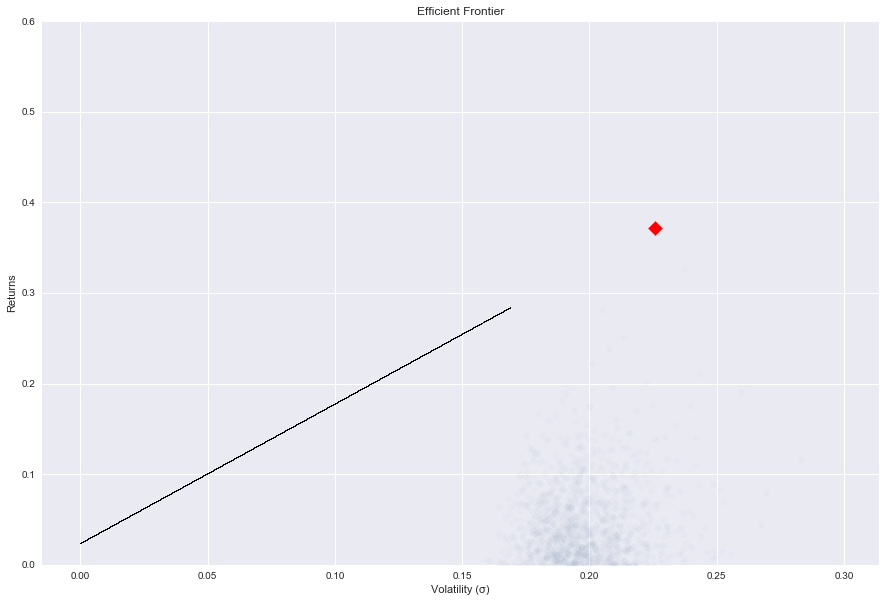

In [122]:
#Finding the portfolio weights that offer the best risk adjusted return 

maxx = [i for i, j in enumerate(portfolios['Sharpe Ratio']) if j == max(portfolios['Sharpe Ratio'])]
optimal_weights = pd.DataFrame((list(weights.loc['C%d'%(maxx[0])])),tickers)
print("---- Optimized Portfolio Weights ----")
print(optimal_weights.T)
print()
print('-------------------------------------')
print()
conclusion = list(portfolio_metrics.loc["C%d"%(maxx[0])])

print('Portfolio Return: %.3f %s' % (conclusion[0]*100,'%'))
print('Portfolio Standard Deviation: %.3f %s' % (conclusion[1]*100,'%'))
print('Sharpe Ratio: %.3f' % (conclusion[2]))
print()
print('-------------------------------------')

def capital_allocation_line(): #Rp = RFR + SR(Psigma)
    x = [i/800000 for i in range(0,135000)]
    y = [(conclusion[2]*i)+risk_free_rate for i in x]
    return x,y

plt.style.use('seaborn')
plt.figure(figsize=(15, 10))
plt.scatter(portfolios['P_STD'],portfolios['P_Return'],cmap='afmhot', marker='o', s=35, alpha=0.02)
plt.scatter(conclusion[1],conclusion[0], marker = 'D',s=100,c='r')
x,y = capital_allocation_line()

plt.scatter(x,y,marker='.', color = 'k', s=1, )
plt.ylim((0,0.6))
plt.xlabel('Volatility (σ)')
plt.ylabel('Returns')
plt.title('Efficient Frontier')

plt.show()

In [53]:
# French-Fama 3 Factor Regression Analysis 

data = pd.read_csv('/Users/landonbuechner/Documents/Finance/Portfolio Optimization/3_factors.csv')
